# Inteligência Artificial - Laboratório 4
## Aluno: Brendo Bubela Vidal

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/BrendoVidal/Inteligencia-Artificial/main/emprestimo.csv'
df = pd.read_csv(url, delimiter=';', error_bad_lines=False)
df

,montante,idade,salario,tem_conta,empresta
0,Medio,Senior,Baixo,Sim,Nao
1,Medio,Senior,Baixo,Nao,Nao
2,Baixo,Senior,Baixo,Sim,Sim
3,Alto,Media,Baixo,Sim,Sim
4,Alto,Jovem,Alto,Sim,Sim
5,Alto,Jovem,Alto,Nao,Nao
6,Baixo,Jovem,Alto,Nao,Sim
7,Medio,Media,Baixo,Sim,Nao
8,Medio,Jovem,Alto,Sim,Sim
9,Alto,Media,Alto,Sim,Sim


In [3]:
# factorize – codifica os valores categóricos – árvore de decisão do Python precisa de dados numéricos
df['empresta'],class_names = pd.factorize(df['empresta']) # False=0; True=1
print(class_names)
print(df['empresta'].unique()) #Não=0; Sim=1

Index(['Nao', 'Sim'], dtype='object')
[0 1]


In [4]:
df['montante'],_ = pd.factorize(df['montante'])
print(df['montante'].unique()) #Medio=0; Baixo=1; Alto=2

[0 1 2]


In [5]:
df['idade'],_ = pd.factorize(df['idade'])
print(df['idade'].unique()) #Senior=0; Media=1; Jovem=3

[0 1 2]


In [6]:
df['salario'],_ = pd.factorize(df['salario'])
print(df['salario'].unique()) #Baixo=0; Alto=1

[0 1]


In [7]:
df['tem_conta'],_ = pd.factorize(df['tem_conta'])
print(df['tem_conta'].unique()) #Sim=0; Não=1

[0 1]


In [8]:
df

,montante,idade,salario,tem_conta,empresta
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1
5,2,2,1,1,0
6,1,2,1,1,1
7,0,1,0,0,0
8,0,2,1,0,1
9,2,1,1,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   montante   14 non-null     int64
 1   idade      14 non-null     int64
 2   salario    14 non-null     int64
 3   tem_conta  14 non-null     int64
 4   empresta   14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


## Treinamento e Testes - Abordagem 1

In [10]:
# Variáveis X são as colunas features e Variáveis Y trata-se da coluna target
# separa as colunas de features (colunas com os dados)
feature_cols = ['montante','idade','salario','tem_conta']
X_train = df[feature_cols]   # Features (conj. dados)

In [11]:
# separa a coluna target (colunas com os dados das classes)
y_train = df.empresta         # Target variable (conj. dados)	

In [12]:
# mostra as colunas separadas para treinamento
X_train.columns   # nomes das colunas features para treinamento
df.columns[4]       # nome da coluna target para reinamento

'empresta'

In [13]:
# constrói o modelo usando critério “Entropia”
clf = DecisionTreeClassifier(criterion='entropy')

In [14]:
# treina o modelo – observe que nessa abordagem está usando os mesmos dados para treinamento e testes (sem separação)
clf = clf.fit(X_train,y_train)

In [15]:
clf

DecisionTreeClassifier(criterion='entropy')

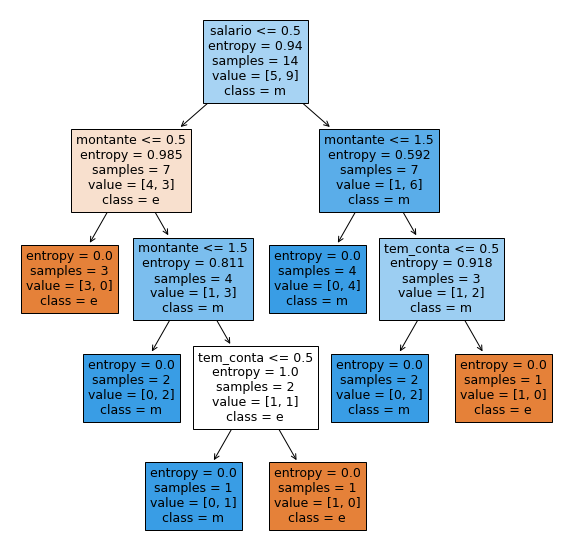

In [16]:
fig1 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=X_train.columns,class_names=df.columns[4], filled=True)
fig1.savefig("fig1.png")

## Treinamentos e Testes - Abordagem 2

In [17]:
# separa as colunas de features (colunas com os dados)
feature_cols = ['montante','idade','salario','tem_conta']
X_train = df[feature_cols]   # Features (conj. dados)

In [18]:
# separa a coluna target (colunas com os dados das classes)
y_train = df.empresta                   # Target variable (conj. dados)

In [19]:
# Uso do Modelo para fazer Classificações com os dados de Testes
# Para funcionar, deve ser importada a biblioteca:
from sklearn.model_selection import train_test_split

In [20]:
# Separação de dados para Treinamento (train) e Testes (test); Variáveis X são as colunas features e 
# Variáveis Y trata-se da coluna target
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [21]:
# Visualização dos dados de Treinamento e Testes, já separados
X_train
X_test

,montante,idade,salario,tem_conta
3,2,1,0,0
7,0,1,0,0
6,1,2,1,1
2,1,0,0,0
10,0,1,1,1


In [22]:
# constrói o modelo usando critério “Entropia”
clf = DecisionTreeClassifier(criterion='entropy')

In [23]:
# treina o modelo – observe que nessa abordagem está usando os mesmos dados para treinamento e testes (sem separação)
clf = clf.fit(X_train,y_train)

In [24]:
clf

DecisionTreeClassifier(criterion='entropy')

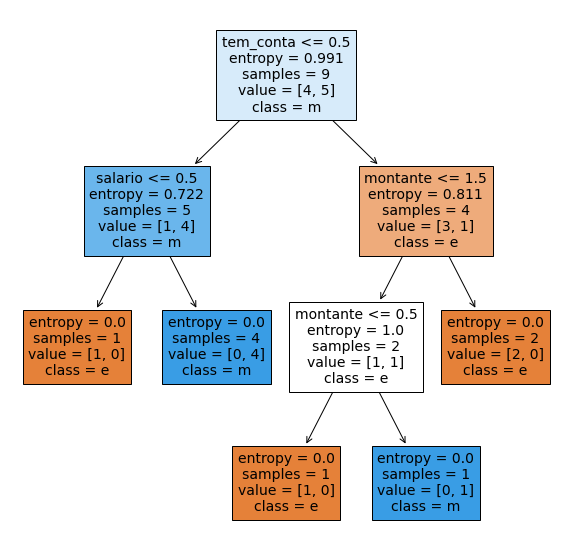

In [25]:
# mostra a árvore
fig2 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=X_train.columns,class_names=df.columns[4], filled=True)
fig2.savefig("fig2.png")

In [26]:
# uso do modelo para fazer predições (classificações) com os dados de testes
y_pred = clf.predict(X_test)

In [27]:
# como o nosso modelo performou ?
# Para funcionar, deve ser importada a biblioteca:
from sklearn import metrics

In [28]:
count_misclassified = (y_test != y_pred).sum()
print('Amostras erroneamente classificadas: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Acuracia: {:.2f}'.format(accuracy))

Amostras erroneamente classificadas: 3
Acuracia: 0.40


In [29]:
# Testando uma amostra especifica!
# Para funcionar, deve ser importada a biblioteca:
import numpy as np

In [30]:
# Para a Entrada montante=1 ; idade=0; salario=1; tem_conta=0
# Qual a classe (saída)?
W_test = np.array ([[1, 0, 1, 0]]) 
y_pred = clf.predict(W_test)
print(y_pred)
# Resposta: 1 (Yes) -

[1]
